In [55]:
import os
from scipy.odr import *
DIR = os.path.abspath('')
DATA = os.path.join(DIR, '../Data/Aufg21.csv')
PLOTS = os.path.join(DIR, '../Plots')

sns.set_style('whitegrid')

data = pd.read_csv(DATA, comment='#', engine='python')
data['O'] = np.arange(-5,11)
data.head(3)

,I[A],O
0,-0.425,-5
1,-0.365,-4
2,-0.252,-3


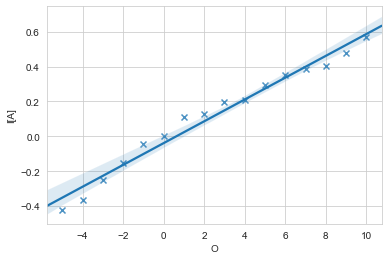

In [56]:
sns.regplot(x='O', y='I[A]', data=data, marker='x')
plt.savefig(os.path.join(PLOTS, 'Aufg21'), dpi=200)

In [69]:
def lin(B, x):
    return B*x

def to_c(lmbda, N, fit):
    return lmbda / (2 * N * fit)

def to_dc(lmbda, N, fit, dfit):
    return lmbda * dfit / (2 * N * fit**2) 

linear = Model(lin)

N = 2000
lmbda = 632.8e-9  # m
m_err = 2
I_err = 0.04  # A

# SCHAU DEFNITIV NOCHMAL DRÜBERE ;)
data_ = Data(data['O'], data['I[A]'], m_err, I_err)
odr = ODR(data_, linear, beta0=[1e-9])
output = odr.run()
print("c = ", to_c(lmbda, N, output.beta), "+/-", to_dc(lmbda, N, output.beta, output.sd_beta))

c =  [2.66507955e-09] +/- [1.27183553e-10]
